In [1]:
%pylab inline
import pandas as pd
import os
import scipy.stats

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Paths
DATADIR="/storage/mgymrek/chipmunk/fig2_spikein"
OUTDIR=os.path.join(DATADIR, "pdfs")

FIG2COLOR = "darkblue"

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load read counts
rcs = pd.read_csv(os.path.join(DATADIR, "chipmunk_spikein_readcounts.txt"), sep=" ", names=["spike", "reads","spikereads","targetreads"])
rcs

,spike,reads,spikereads,targetreads
0,0.01,1000000,78459,921541
1,0.10,1000000,21382,978637
2,0.25,1000000,16535,983488
3,0.50,1000000,15320,984711
4,0.80,1000000,14766,985257
5,1.00,1000000,14541,985480


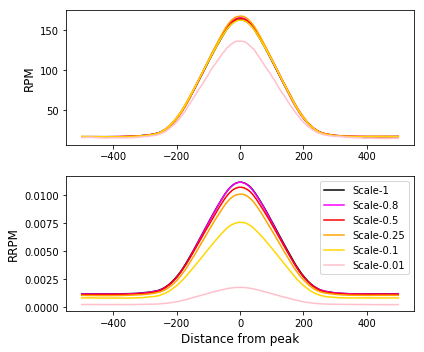

In [4]:
# Load Homer
def ParseCol(col):
    return "spike-"+col.split("/")[-1].replace("chipmunk_spikein_","").replace(" Coverage","").split("_")[0]

hist = pd.read_csv(os.path.join(DATADIR, "spikein_histograms.txt"), sep="\t")
hist.columns = ["dist"] + list(hist.columns)[1:]
hist = hist[[item for item in hist.columns if "Coverage" in item or "dist" in item]]
hist.columns = ["dist"] + [ParseCol(col) for col in list(hist.columns)[1:]]

# Normalize
scales = [0.01, 0.1, 0.25, 0.5, 0.8, 1]
scales.reverse()
for scale in scales:
    numreads = rcs[rcs["spike"]==scale]["reads"].values[0]
    numspike = rcs[rcs["spike"]==scale]["spikereads"].values[0]
    hist["spike-%s-RPM"%scale] = hist["spike-%s"%scale]/numreads*1000000
    hist["spike-%s-RRPM"%scale] = hist["spike-%s"%scale]/numspike/numreads*1000000

colors = ["pink", "gold", "orange", "red", "magenta", "black"]
colors.reverse()

# Plot
fig = plt.figure()
fig.set_size_inches((6, 5))
ax = fig.add_subplot(211)
i = 0
for scale in scales:
    ax.plot(hist["dist"], hist["spike-%s-RPM"%scale], color=colors[i])
    i += 1
ax.set_ylabel("RPM", size=12)

ax = fig.add_subplot(212)
i = 0
for scale in scales:
    ax.plot(hist["dist"], hist["spike-%s-RRPM"%scale], color=colors[i], label="Scale-%s"%scale)
    i += 1
ax.set_xlabel("Distance from peak", size=12);
ax.set_ylabel("RRPM", size=12)
ax.legend(loc="upper right")
fig.tight_layout()
fig.savefig(os.path.join(OUTDIR, "Fig2_Spikein.pdf"))

#hist.head()